In [1]:
import os
import math

from GENE_sim_tools.GENE_sim_reader.src.sims_to_xarray import filepath_to_sim_df
from GENE_sim_tools.GENE_sim_reader.src.utils.find_buried_filetypes import find_buried_filetypes

from GENE_sim_tools.GENE_sim_reader.src.GENE_data_extraction.field_data_analysis.append_field_analysis import complex_array_data_analysis


# Test paths

In [2]:
test_parent_dir = '/pscratch/sd/j/joeschm/NSXTU_discharges/X_TEST'

test_scanfile_dirs = []
for paths in os.listdir(test_parent_dir):
    if paths.startswith('scanfiles'):
        test_scanfile_dirs.append(os.path.join(test_parent_dir, paths))

# print(test_scanfile_dirs)

test_sim_dirs = []
for paths in os.listdir(test_parent_dir):
    if paths.startswith('TEST_3spec'):
        test_sim_dirs.append(os.path.join(test_parent_dir, paths))

# print(test_sim_dirs)

test_param_paths = []
for files in os.listdir(test_scanfile_dirs[0]):
    if files.startswith('parameters_'):
        test_param_paths.append(os.path.join(test_scanfile_dirs[0], files))

for files in os.listdir(test_sim_dirs[0]):
    if files.startswith('parameters'):
        test_param_paths.append(os.path.join(test_sim_dirs[0], files))

# print(test_param_paths)

all_test_paths = [test_parent_dir] + test_scanfile_dirs + test_sim_dirs + test_param_paths

In [3]:
test_parent_dir = '/pscratch/sd/j/joeschm/NSXTU_discharges/132588/r_0.736_q=4_MTM_mode/convergence_check/nz0_hpyz_edgeopt_scans'

all_test_paths = find_buried_filetypes(test_parent_dir)

In [4]:
all_test_paths = all_test_paths[:50]
len(all_test_paths)

50

# Functions tests

In [5]:
sim_df = filepath_to_sim_df(all_test_paths)

In [6]:
# sim_df['name1']

In [7]:
analysis_sim_df = complex_array_data_analysis(sim_df, 'phi')

In [8]:
print(analysis_sim_df['phi_fft_info'][6]['ave_freq'])
print(analysis_sim_df['phi_fft_info'][6]['lower_95_freq'])
print(analysis_sim_df['phi_fft_info'][6]['upper_95_freq'])

0.26791345170254477
0.21804646739436773
0.31626905388990334


In [12]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

def plotting_function(complex_array, zgrid, field_name, verbose:bool=False):

    if field_name == 'field_phi':
        title = r'$\phi$'
        real_label = r'$Re[\phi]$'
        imag_label = r'$Im[\phi]$'
        abs_label = r'$|\phi|$'
    elif field_name == 'field_apar':
        title = r'$A_{||}$'
        real_label = r'$Re[A_{||}]$'
        imag_label = r'$Im[A_{||}]$'
        abs_label = r'$|A_{||}|$'
    else:
        title = real_label = imag_label = abs_label = ''

    if verbose:
        fig = plt.figure(figsize=(8, 10))
        gs = gridspec.GridSpec(3, 1, height_ratios=[2, 1, 1])

        ax1 = fig.add_subplot(gs[0])
        ax2 = fig.add_subplot(gs[1])
        ax3 = fig.add_subplot(gs[2])

        # Plot the complex field
        ax1.plot(zgrid, np.real(complex_array), label=real_label, color='red')
        ax1.plot(zgrid, np.imag(complex_array), label=imag_label, color='blue')
        ax1.plot(zgrid, np.abs(complex_array), label=abs_label, color='black')
        ax1.set_title(title)
        ax1.set_xlabel(r'$z/\pi$', size=18)
        ax1.legend()
        ax1.grid(True)

        # # Plot angle difference histogram
        # angles = get_delta_angle_counts(complex_array)
        # print(angles)
        # counts, bins = np.histogram(angles, bins=100)
        # total_samples = len(angles)
        # relative_frequency = counts / total_samples
        # ax2.bar(bins[:-1], relative_frequency, width=np.diff(bins), edgecolor='black', align='edge')
        # ax2.set_title('Histogram of Delta Angles (Relative to Sample Size)')
        # ax2.set_xlabel('Delta Angle (rad)')
        # ax2.set_ylabel('Relative Frequency')

        # # Plot Fourier decomposition
        # norm_freq, norm_mag, _ = compute_fourier_decomposition(complex_array)
        # ax3.stem(norm_freq, norm_mag, 'b', markerfmt=" ", basefmt="-b")
        # ax3.set_title('Normalized Magnitude Spectrum of the Fourier Transform')
        # ax3.set_xlabel('Normalized Frequency')
        # ax3.set_ylabel('Normalized Magnitude')
        # ax3.grid(True)

        plt.tight_layout()
        plt.show()

    else:
        plt.figure(figsize=(8, 4))
        plt.title(title)
        plt.plot(zgrid, np.real(complex_array), label=real_label, color='red')
        plt.plot(zgrid, np.imag(complex_array), label=imag_label, color='blue')
        plt.plot(zgrid, np.abs(complex_array), label=abs_label, color='black')
        plt.xlabel(r'$z/\pi$', size=18)
        plt.legend()
        plt.grid(True)
        plt.show()



No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


0.21804646739436773 0.26791345170254477 0.31626905388990334 0.24993024553571427
0.1991855697741928 0.24580477152629981 0.2937160049152236 0.24993024553571427
0.34858200518014976 0.387061648875068 0.4273655725784632 0.24993024553571427
0.3332302291892135 0.3751726824574001 0.4142126778386544 0.24993024553571427
0.24997694967250625 0.2974207918104835 0.34289293640929386 0.24993024553571427
0.38160561671401516 0.4165257308378596 0.4512389601229934 0.24993024553571427
0.39170380845283187 0.4254664178927361 0.45714892683813585 0.24993024553571427
0.004291731488997114 0.005612796393104586 0.00929159867367875 0.24993024553571427


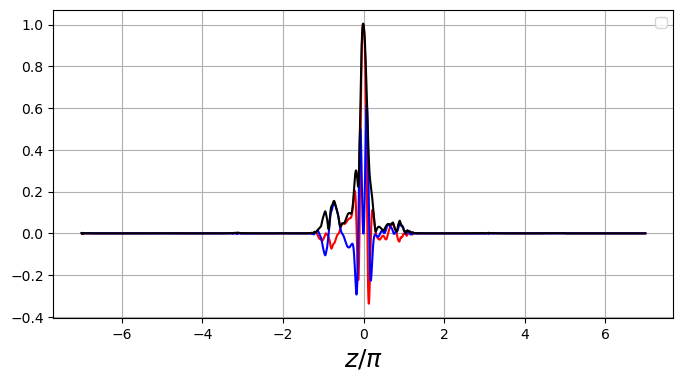

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


0.004391451132417929 0.005553799838695735 0.007776869912856242 0.24993024553571427


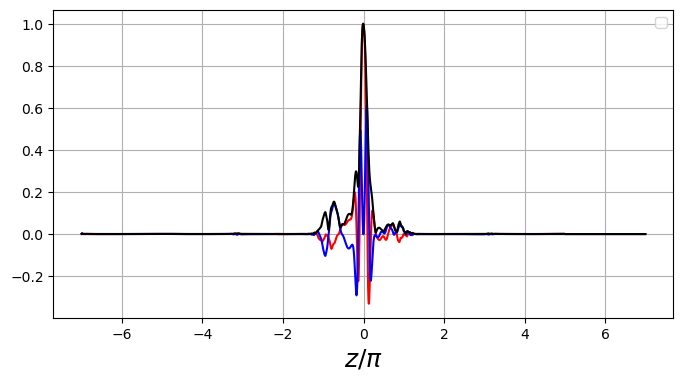

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


0.048673284181096683 0.08604878764420086 0.12462935789254141 0.24993024553571427


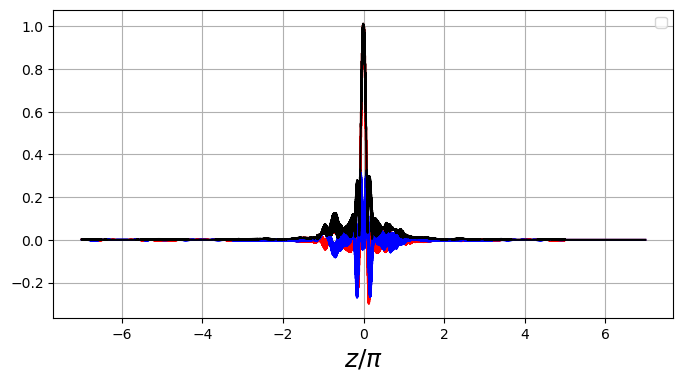

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


0.0042917314889971145 0.005438467595103786 0.008081077938988093 0.24993024553571427


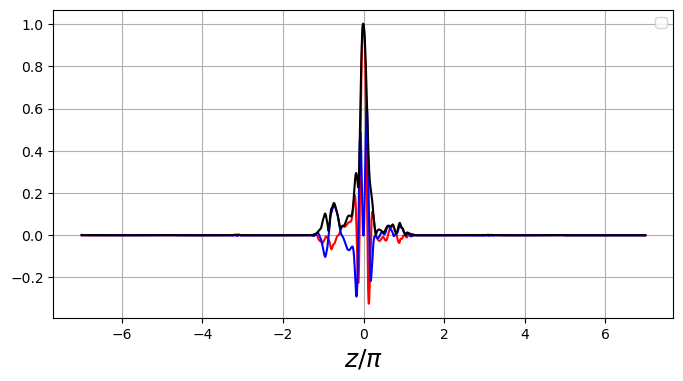

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


0.2884270769920183 0.334401527179891 0.3753119187127977 0.24993024553571427
0.27769143689968884 0.3226635290859255 0.3692429054777688 0.24993024553571427
0.004641381377953643 0.01782312890876113 0.03458756897941468 0.24993024553571427


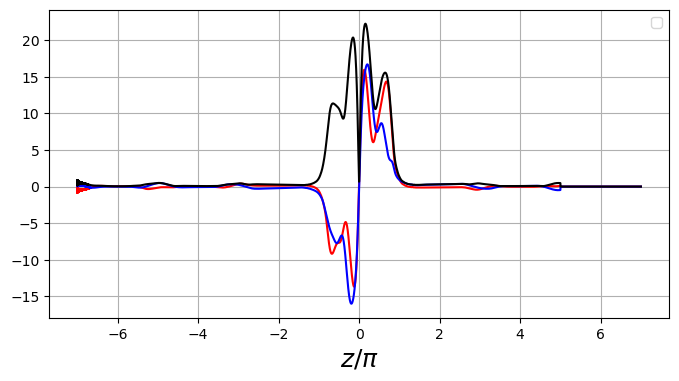

0.004186962749706889 0.015293971427006687 0.031309443486201294 0.24993024553571427


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


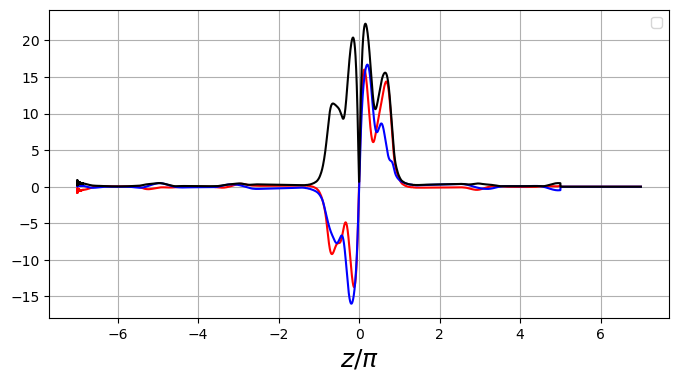

0.29450997524068806 0.34077726974464706 0.38479916985141593 0.24993024553571427
0.003079948480339105 0.011456973143210708 0.024037483160285894 0.24993024553571427


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


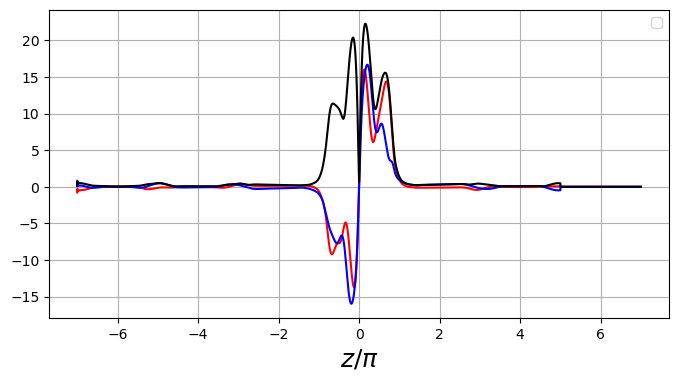

0.2850176750062003 0.33120111023519355 0.3758105169299017 0.24993024553571427
0.23114634662754777 0.2792363393782857 0.32603274302737195 0.24993024553571427
0.35934036620389165 0.39940514244445235 0.43287539844595513 0.24993024553571427
0.37528667323345055 0.4108163936345437 0.4470974392361111 0.24993024553571427


In [20]:


for ind, row in analysis_sim_df.iterrows():

    field_name = 'phi'
    phi_array = row[field_name]
    zgrid = row['zgrid']

    if isinstance(phi_array, np.ndarray):

        ave_freq = row[f'{field_name}_fft_info']['ave_freq']
        lower_95_freq = row[f'{field_name}_fft_info']['lower_95_freq']
        upper_95_freq = row[f'{field_name}_fft_info']['upper_95_freq']
        max_freq = max(row[f'{field_name}_fft_info']['fft_freq'])

        print(lower_95_freq, ave_freq, upper_95_freq, max_freq/2)

        if upper_95_freq < max_freq/2:
            plotting_function(phi_array, zgrid, field_name)